In [28]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import cv2
import os
import glob
from skimage.morphology import skeletonize
from skimage import data

%matplotlib inline

# The sketchy dataset

The test is based on detaset http://sketchy.eye.gatech.edu/

In the dataset, 670 chair sketches are included. The dataset is only used here for test model.
Data should be uncomprassed and locate at `data/rendered_256x256/`.


In [133]:
path = "data/rendered_256x256/256x256/sketch/{:s}/chair"
dst = "data/rendered_256x256/chair_sketch_cropped/"
folders = ["tx_000000000000","tx_000000000010","tx_000000000110",
           "tx_000000001010","tx_000000001110","tx_000100000000"]

reshape_dim = (256, 256)


# Data processing

The sketch dataset has two major differences from our training data:
1. The sketch is not necessarily center-located nor fully fillin the canvos.
2. The lines of the sketch is much thicker than our training dataset.

As a result, the data processing includes:
1. Crop the sketch and minimize white padding.
2. Resize to $256 \times 256$
3. Skeletonize the lines
4. Save to a seperate path

Finally the images are combined into pseudo pairs to feed as test data


In [123]:
def crop_image (file_name): 
    ## read image:
    img = cv2.imread(file_name)
    
    ## (1) Convert to gray, and threshold
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    th, threshed = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

    ## (2) Morph-op to remove noise
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    morphed = cv2.morphologyEx(threshed, cv2.MORPH_CLOSE, kernel)

    ## (3) Find the max-area contour
    cnts = cv2.findContours(morphed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
    cnt = sorted(cnts, key=cv2.contourArea)[-1]
    
    ## (4) Crop and save it
    x,y,w,h = cv2.boundingRect(cnt)
    dst = gray[y:y+h, x:x+w]

    ## add minor padding
    height = int( max(0, w - h) / 2.0) + 10
    width = int( max(0, h - w) / 2.0) + 10
    padded = cv2.copyMakeBorder( dst, height, height, width, width, cv2.BORDER_CONSTANT, value = [255, 255, 255])

    return cv2.bitwise_not(padded)

Finished data/rendered_256x256/chair_sketch_cropped/tx_000000000000, Examples:


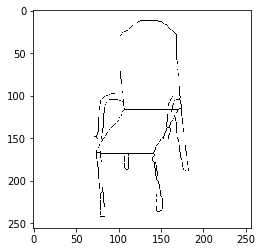

In [124]:
for t in folders:
    d = dst + t
    if not os.path.exists(dst):
        os.makedirs(dst)
    for f in glob.glob(path.format(folders[0]) + "/*.png"):
        cropped = crop_image(f)
        resized = cv2.resize(cropped, reshape_dim, interpolation = cv2.INTER_AREA)
        skeleton = skeletonize(resized / 255)
        final = (1 - np.float32(skeleton)) * 255
        cv2.imwrite( d + f.split("/")[-1] , final )
    print("Finished {:s}, Examples:".format(d))
    plt.imshow(final, "gray")
    plt.show()
    # the images in these folders are the same
    break


In [125]:
!python tools/process.py \
  --input_dir  $dst \
  --b_dir $dst \
  --operation combine \
  --output_dir data/rendered_256x256/chair_sketch_combine_test

/Users/huijie/.pyenv/versions/3.5.7/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/huijie/.pyenv/versions/3.5.7/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/huijie/.pyenv/versions/3.5.7/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/huijie/.pyenv/versions/3.5.7/lib/pyt

41/669 complete  100.11 images/sec  0m0s elapsed  0m6s remaining
42/669 complete  100.50 images/sec  0m0s elapsed  0m6s remaining
43/669 complete  100.96 images/sec  0m0s elapsed  0m6s remaining
44/669 complete  101.47 images/sec  0m0s elapsed  0m6s remaining
45/669 complete  101.90 images/sec  0m0s elapsed  0m6s remaining
46/669 complete  102.34 images/sec  0m0s elapsed  0m6s remaining
47/669 complete  102.79 images/sec  0m0s elapsed  0m6s remaining
48/669 complete  103.14 images/sec  0m0s elapsed  0m6s remaining
49/669 complete  103.68 images/sec  0m0s elapsed  0m5s remaining
50/669 complete  104.14 images/sec  0m0s elapsed  0m5s remaining
51/669 complete  104.53 images/sec  0m0s elapsed  0m5s remaining
52/669 complete  104.89 images/sec  0m0s elapsed  0m5s remaining
53/669 complete  105.34 images/sec  0m0s elapsed  0m5s remaining
54/669 complete  105.52 images/sec  0m0s elapsed  0m5s remaining
55/669 complete  105.86 images/sec  0m0s elapsed  0m5s remaining
56/669 complete  106.17 i

170/669 complete  118.62 images/sec  0m1s elapsed  0m4s remaining
171/669 complete  118.64 images/sec  0m1s elapsed  0m4s remaining
172/669 complete  118.69 images/sec  0m1s elapsed  0m4s remaining
173/669 complete  118.73 images/sec  0m1s elapsed  0m4s remaining
174/669 complete  118.78 images/sec  0m1s elapsed  0m4s remaining
175/669 complete  118.82 images/sec  0m1s elapsed  0m4s remaining
176/669 complete  118.84 images/sec  0m1s elapsed  0m4s remaining
177/669 complete  118.88 images/sec  0m1s elapsed  0m4s remaining
178/669 complete  118.92 images/sec  0m1s elapsed  0m4s remaining
179/669 complete  118.94 images/sec  0m1s elapsed  0m4s remaining
180/669 complete  118.96 images/sec  0m1s elapsed  0m4s remaining
181/669 complete  119.00 images/sec  0m1s elapsed  0m4s remaining
182/669 complete  119.07 images/sec  0m1s elapsed  0m4s remaining
183/669 complete  119.07 images/sec  0m1s elapsed  0m4s remaining
184/669 complete  119.10 images/sec  0m1s elapsed  0m4s remaining
185/669 co

296/669 complete  117.98 images/sec  0m2s elapsed  0m3s remaining
297/669 complete  118.02 images/sec  0m2s elapsed  0m3s remaining
298/669 complete  118.05 images/sec  0m2s elapsed  0m3s remaining
299/669 complete  118.08 images/sec  0m2s elapsed  0m3s remaining
300/669 complete  118.12 images/sec  0m2s elapsed  0m3s remaining
301/669 complete  118.18 images/sec  0m2s elapsed  0m3s remaining
302/669 complete  118.24 images/sec  0m2s elapsed  0m3s remaining
303/669 complete  118.25 images/sec  0m2s elapsed  0m3s remaining
304/669 complete  118.21 images/sec  0m2s elapsed  0m3s remaining
305/669 complete  118.09 images/sec  0m2s elapsed  0m3s remaining
306/669 complete  117.95 images/sec  0m2s elapsed  0m3s remaining
307/669 complete  117.80 images/sec  0m2s elapsed  0m3s remaining
308/669 complete  117.71 images/sec  0m2s elapsed  0m3s remaining
309/669 complete  117.71 images/sec  0m2s elapsed  0m3s remaining
310/669 complete  117.62 images/sec  0m2s elapsed  0m3s remaining
311/669 co

425/669 complete  118.70 images/sec  0m3s elapsed  0m2s remaining
426/669 complete  118.71 images/sec  0m3s elapsed  0m2s remaining
427/669 complete  118.74 images/sec  0m3s elapsed  0m2s remaining
428/669 complete  118.76 images/sec  0m3s elapsed  0m2s remaining
429/669 complete  118.77 images/sec  0m3s elapsed  0m2s remaining
430/669 complete  118.79 images/sec  0m3s elapsed  0m2s remaining
431/669 complete  118.81 images/sec  0m3s elapsed  0m2s remaining
432/669 complete  118.82 images/sec  0m3s elapsed  0m1s remaining
433/669 complete  118.82 images/sec  0m3s elapsed  0m1s remaining
434/669 complete  118.83 images/sec  0m3s elapsed  0m1s remaining
435/669 complete  118.87 images/sec  0m3s elapsed  0m1s remaining
436/669 complete  118.91 images/sec  0m3s elapsed  0m1s remaining
437/669 complete  118.93 images/sec  0m3s elapsed  0m1s remaining
438/669 complete  118.95 images/sec  0m3s elapsed  0m1s remaining
439/669 complete  118.97 images/sec  0m3s elapsed  0m1s remaining
440/669 co

550/669 complete  119.53 images/sec  0m4s elapsed  0m0s remaining
551/669 complete  119.51 images/sec  0m4s elapsed  0m0s remaining
552/669 complete  119.51 images/sec  0m4s elapsed  0m0s remaining
553/669 complete  119.49 images/sec  0m4s elapsed  0m0s remaining
554/669 complete  119.47 images/sec  0m4s elapsed  0m0s remaining
555/669 complete  119.48 images/sec  0m4s elapsed  0m0s remaining
556/669 complete  119.47 images/sec  0m4s elapsed  0m0s remaining
557/669 complete  119.47 images/sec  0m4s elapsed  0m0s remaining
558/669 complete  119.49 images/sec  0m4s elapsed  0m0s remaining
559/669 complete  119.50 images/sec  0m4s elapsed  0m0s remaining
560/669 complete  119.52 images/sec  0m4s elapsed  0m0s remaining
561/669 complete  119.54 images/sec  0m4s elapsed  0m0s remaining
562/669 complete  119.57 images/sec  0m4s elapsed  0m0s remaining
563/669 complete  119.55 images/sec  0m4s elapsed  0m0s remaining
564/669 complete  119.56 images/sec  0m4s elapsed  0m0s remaining
565/669 co

# Test

Test with two models and copying the

In [127]:
!python pix2pix.py \
  --mode test \
  --output_dir chair_non_ikea2 \
  --input_dir data/rendered_256x256/chair_sketch_combine_test \
  --checkpoint models/edges2chair_AtoB_299965

/Users/huijie/.pyenv/versions/3.5.7/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/huijie/.pyenv/versions/3.5.7/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/huijie/.pyenv/versions/3.5.7/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/huijie/.pyenv/versions/3.5.7/lib/pyt

W0813 13:40:35.108839 4514383296 deprecation.py:323] From pix2pix.py:135: batch_normalization (from tensorflow.python.layers.normalization) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
W0813 13:40:35.428347 4514383296 deprecation.py:323] From pix2pix.py:119: conv2d_transpose (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.
W0813 13:40:35.881342 4514383296 deprecation.py:506] From pix2pix.py:386: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W08

evaluated image tx_000000000000n02738535_18391-5
evaluated image tx_000000000000n02738535_18559-1
evaluated image tx_000000000000n02738535_18559-2
evaluated image tx_000000000000n02738535_18559-3
evaluated image tx_000000000000n02738535_18559-4
evaluated image tx_000000000000n02738535_18559-5
evaluated image tx_000000000000n02738535_18559-6
evaluated image tx_000000000000n02738535_18844-1
evaluated image tx_000000000000n02738535_18844-2
evaluated image tx_000000000000n02738535_18844-3
evaluated image tx_000000000000n02738535_18844-4
evaluated image tx_000000000000n02738535_18844-5
evaluated image tx_000000000000n02738535_19372-1
evaluated image tx_000000000000n02738535_19372-2
evaluated image tx_000000000000n02738535_19372-3
evaluated image tx_000000000000n02738535_19372-4
evaluated image tx_000000000000n02738535_19372-5
evaluated image tx_000000000000n02738535_19372-6
evaluated image tx_000000000000n02738535_19372-7
evaluated image tx_000000000000n02738535_20621-1
evaluated image tx_0

evaluated image tx_000000000000n03001627_1018-1
evaluated image tx_000000000000n03001627_1018-2
evaluated image tx_000000000000n03001627_1018-3
evaluated image tx_000000000000n03001627_1018-4
evaluated image tx_000000000000n03001627_1018-5
evaluated image tx_000000000000n03001627_1018-6
evaluated image tx_000000000000n03001627_1077-1
evaluated image tx_000000000000n03001627_1077-10
evaluated image tx_000000000000n03001627_1077-2
evaluated image tx_000000000000n03001627_1077-3
evaluated image tx_000000000000n03001627_1077-4
evaluated image tx_000000000000n03001627_1077-5
evaluated image tx_000000000000n03001627_1077-6
evaluated image tx_000000000000n03001627_1077-7
evaluated image tx_000000000000n03001627_1077-8
evaluated image tx_000000000000n03001627_1077-9
evaluated image tx_000000000000n03001627_121-1
evaluated image tx_000000000000n03001627_121-2
evaluated image tx_000000000000n03001627_121-3
evaluated image tx_000000000000n03001627_121-4
evaluated image tx_000000000000n03001627_12

evaluated image tx_000000000000n03001627_2277-3
evaluated image tx_000000000000n03001627_2277-4
evaluated image tx_000000000000n03001627_2277-5
evaluated image tx_000000000000n03001627_2277-6
evaluated image tx_000000000000n03001627_2448-1
evaluated image tx_000000000000n03001627_2448-2
evaluated image tx_000000000000n03001627_2448-3
evaluated image tx_000000000000n03001627_2448-4
evaluated image tx_000000000000n03001627_2448-5
evaluated image tx_000000000000n03001627_2450-1
evaluated image tx_000000000000n03001627_2450-10
evaluated image tx_000000000000n03001627_2450-11
evaluated image tx_000000000000n03001627_2450-2
evaluated image tx_000000000000n03001627_2450-3
evaluated image tx_000000000000n03001627_2450-4
evaluated image tx_000000000000n03001627_2450-5
evaluated image tx_000000000000n03001627_2450-6
evaluated image tx_000000000000n03001627_2450-7
evaluated image tx_000000000000n03001627_2450-8
evaluated image tx_000000000000n03001627_2450-9
evaluated image tx_000000000000n030016

evaluated image tx_000000000000n03001627_658-4
evaluated image tx_000000000000n03001627_658-5
evaluated image tx_000000000000n03001627_6765-1
evaluated image tx_000000000000n03001627_6765-2
evaluated image tx_000000000000n03001627_6765-3
evaluated image tx_000000000000n03001627_6765-4
evaluated image tx_000000000000n03001627_6765-5
evaluated image tx_000000000000n03001627_6765-6
evaluated image tx_000000000000n03001627_6765-7
evaluated image tx_000000000000n03001627_6765-8
evaluated image tx_000000000000n03001627_679-1
evaluated image tx_000000000000n03001627_679-2
evaluated image tx_000000000000n03001627_679-3
evaluated image tx_000000000000n03001627_679-4
evaluated image tx_000000000000n03001627_679-5
evaluated image tx_000000000000n03001627_679-6
evaluated image tx_000000000000n03001627_762-1
evaluated image tx_000000000000n03001627_762-2
evaluated image tx_000000000000n03001627_762-3
evaluated image tx_000000000000n03001627_762-4
evaluated image tx_000000000000n03001627_762-5
evalu

In [128]:
!python pix2pix.py \
  --mode test \
  --output_dir chair_ikea2 \
  --input_dir data/rendered_256x256/chair_sketch_combine_test \
  --checkpoint models/edges2chair_ikea

/Users/huijie/.pyenv/versions/3.5.7/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/huijie/.pyenv/versions/3.5.7/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/huijie/.pyenv/versions/3.5.7/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/huijie/.pyenv/versions/3.5.7/lib/pyt

W0813 13:42:07.201611 4553811392 deprecation.py:323] From pix2pix.py:135: batch_normalization (from tensorflow.python.layers.normalization) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
W0813 13:42:07.528269 4553811392 deprecation.py:323] From pix2pix.py:119: conv2d_transpose (from tensorflow.python.layers.convolutional) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.
W0813 13:42:07.980915 4553811392 deprecation.py:506] From pix2pix.py:386: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W08

evaluated image tx_000000000000n02738535_18391-5
evaluated image tx_000000000000n02738535_18559-1
evaluated image tx_000000000000n02738535_18559-2
evaluated image tx_000000000000n02738535_18559-3
evaluated image tx_000000000000n02738535_18559-4
evaluated image tx_000000000000n02738535_18559-5
evaluated image tx_000000000000n02738535_18559-6
evaluated image tx_000000000000n02738535_18844-1
evaluated image tx_000000000000n02738535_18844-2
evaluated image tx_000000000000n02738535_18844-3
evaluated image tx_000000000000n02738535_18844-4
evaluated image tx_000000000000n02738535_18844-5
evaluated image tx_000000000000n02738535_19372-1
evaluated image tx_000000000000n02738535_19372-2
evaluated image tx_000000000000n02738535_19372-3
evaluated image tx_000000000000n02738535_19372-4
evaluated image tx_000000000000n02738535_19372-5
evaluated image tx_000000000000n02738535_19372-6
evaluated image tx_000000000000n02738535_19372-7
evaluated image tx_000000000000n02738535_20621-1
evaluated image tx_0

evaluated image tx_000000000000n03001627_1018-1
evaluated image tx_000000000000n03001627_1018-2
evaluated image tx_000000000000n03001627_1018-3
evaluated image tx_000000000000n03001627_1018-4
evaluated image tx_000000000000n03001627_1018-5
evaluated image tx_000000000000n03001627_1018-6
evaluated image tx_000000000000n03001627_1077-1
evaluated image tx_000000000000n03001627_1077-10
evaluated image tx_000000000000n03001627_1077-2
evaluated image tx_000000000000n03001627_1077-3
evaluated image tx_000000000000n03001627_1077-4
evaluated image tx_000000000000n03001627_1077-5
evaluated image tx_000000000000n03001627_1077-6
evaluated image tx_000000000000n03001627_1077-7
evaluated image tx_000000000000n03001627_1077-8
evaluated image tx_000000000000n03001627_1077-9
evaluated image tx_000000000000n03001627_121-1
evaluated image tx_000000000000n03001627_121-2
evaluated image tx_000000000000n03001627_121-3
evaluated image tx_000000000000n03001627_121-4
evaluated image tx_000000000000n03001627_12

evaluated image tx_000000000000n03001627_2277-3
evaluated image tx_000000000000n03001627_2277-4
evaluated image tx_000000000000n03001627_2277-5
evaluated image tx_000000000000n03001627_2277-6
evaluated image tx_000000000000n03001627_2448-1
evaluated image tx_000000000000n03001627_2448-2
evaluated image tx_000000000000n03001627_2448-3
evaluated image tx_000000000000n03001627_2448-4
evaluated image tx_000000000000n03001627_2448-5
evaluated image tx_000000000000n03001627_2450-1
evaluated image tx_000000000000n03001627_2450-10
evaluated image tx_000000000000n03001627_2450-11
evaluated image tx_000000000000n03001627_2450-2
evaluated image tx_000000000000n03001627_2450-3
evaluated image tx_000000000000n03001627_2450-4
evaluated image tx_000000000000n03001627_2450-5
evaluated image tx_000000000000n03001627_2450-6
evaluated image tx_000000000000n03001627_2450-7
evaluated image tx_000000000000n03001627_2450-8
evaluated image tx_000000000000n03001627_2450-9
evaluated image tx_000000000000n030016

evaluated image tx_000000000000n03001627_658-4
evaluated image tx_000000000000n03001627_658-5
evaluated image tx_000000000000n03001627_6765-1
evaluated image tx_000000000000n03001627_6765-2
evaluated image tx_000000000000n03001627_6765-3
evaluated image tx_000000000000n03001627_6765-4
evaluated image tx_000000000000n03001627_6765-5
evaluated image tx_000000000000n03001627_6765-6
evaluated image tx_000000000000n03001627_6765-7
evaluated image tx_000000000000n03001627_6765-8
evaluated image tx_000000000000n03001627_679-1
evaluated image tx_000000000000n03001627_679-2
evaluated image tx_000000000000n03001627_679-3
evaluated image tx_000000000000n03001627_679-4
evaluated image tx_000000000000n03001627_679-5
evaluated image tx_000000000000n03001627_679-6
evaluated image tx_000000000000n03001627_762-1
evaluated image tx_000000000000n03001627_762-2
evaluated image tx_000000000000n03001627_762-3
evaluated image tx_000000000000n03001627_762-4
evaluated image tx_000000000000n03001627_762-5
evalu

In [132]:
! mkdir test_result2/
! mkdir test_result2/model_299965/
! mkdir test_result2/model_ikea
! find chair_ikea2/ -type f -name "*outputs.png" -exec cp {} test_result2/model_ikea/ \;
! find chair_non_ikea2/ -type f -name "*outputs.png" -exec cp {} test_result2/model_299965/ \;
